### Example1 

$$ \frac{dy(t)}{dt} = -k * y(t) $$


$$ y_0 = 5 $$

In [217]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import integrate

def func(y, t, k):
    dy_dt = -k * y
    return dy_dt

y0 = 5

t = np.linspace(0, 20)

In [218]:
## 
k = 0.1
y1 = integrate.odeint(func, y0, t, args=(k,))

k = 0.2
y2 = integrate.odeint(func, y0, t, args=(k,))

k = 0.5
y3 = integrate.odeint(func, y0, t, args=(k,))

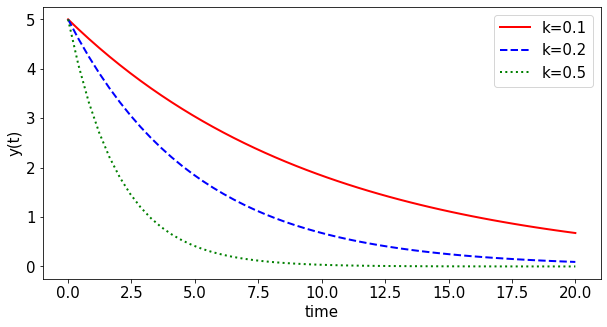

In [219]:
fig = plt.figure(figsize=(10,5))
plt. plot(t, y1, 'r-', linewidth = 2, label = 'k=0.1')
plt. plot(t, y2, 'b--', linewidth = 2, label = 'k=0.2')
plt. plot(t, y3, 'g:', linewidth = 2, label = 'k=0.5')
font1= {'family': 'DejaVu Sans',
       'weight': 'normal',
       'size': 15,}

plt.tick_params(labelsize = 15)
plt.xlabel('time', font1)
plt.ylabel('y(t)', font1)

font2= {'family': 'DejaVu Sans',
       'weight': 'normal',
       'size': 23,}
legend = plt.legend(loc = 'upper right', prop = font1)
plt.show()

### Example 2  

$$ 5\frac{dy(t)}{dt} = -y(t) + u(t) $$


$$ y_0 = 1 $$
$u$ steps from 0 to 2 at $t = 10$

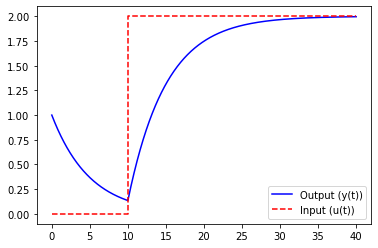

In [220]:
def func1(y, t):
    if t < 10.0:
        u = 0
    else:
        u = 2
        
    dy_dt = 0.2*(-y + u)
    return dy_dt
y0 = 1

t = np.linspace(0, 40, 1000)

y = integrate.odeint(func1, y0, t)

plt.plot(t, y, 'b-', label = 'Output (y(t))')
plt.plot([0, 10, 10, 40], [0, 0, 2, 2], 'r--', label = 'Input (u(t))')
plt.legend()


### Example 3


$$ \frac{dx(t)}{dt} = 3 e^{-t} $$


$$ \frac{dy(t)}{dt} = 3 - y(t) $$


$$ x(0) = 0 $$

$$ y(0) = 0 $$

In [221]:
def func3(z, t):
    dx_dt = 3.0 * np.exp(-t)
    dy_dt = 3 - z[1]
    dz_dt = [dx_dt, dy_dt]
    return dz_dt   

In [222]:
## initial condition
x0 = 0
y0 = 0
z0 = [x0, y0]

In [223]:
## time stepping
t = np.linspace(0, 5)

In [224]:
## solving using odeint
z = integrate.odeint(func3, z0, t)

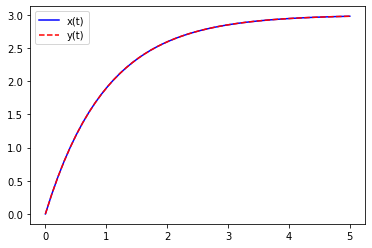

In [225]:
plt.plot(t, z[:, 0], 'b', label = 'x(t)')
plt.plot(t, z[:, 1], 'r--', label = 'y(t)')
plt.legend()

### Example 4

$$ 2\frac{dx(t)}{dt} = -x(t) + u (t) $$


$$ 5\frac{dy(t)}{dt} = -y(t) + x(t) $$


$$ u = 2S(t - 5), x(0) = 0, y(0) = 0 $$

In [226]:
## define some parameters
x0 = 0
y0 = 0
z0 = [x0, y0]

In [227]:
## define function
def func3(z, t):
    if t < 5:
        u = 0
    else:
        u = 2
    dx_dt = 0.5 * (-z[0] + u)
    dy_dt = 0.2 * (-z[1] + z[0])
    dz_dt = [dx_dt, dy_dt]
    return dz_dt

In [228]:
t = np.linspace(0, 20)

In [229]:
z = integrate.odeint(func3, z0, t)

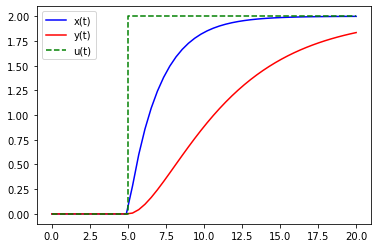

In [230]:
## plot results
plt.plot(t, z[:, 0], 'b-', label = 'x(t)')
plt.plot(t, z[:, 1], 'r', label = 'y(t)')
plt.plot([0, 5, 5, 20], [0, 0, 2, 2], 'g--', label = 'u(t)')
plt.legend()

### Another solution for solving example 4 

In [248]:
## define new function 
def func4(z, t, u):
    x = z[0]
    y = z[1]
    dx_dt = 0.5 * (-x + u)
    dy_dt = 0.2 * (-y + x)
    dz_dt = [dx_dt, dy_dt]
    return dz_dt

In [249]:
## initial condition
z0 = [0, 0]

In [250]:
## time steps
n = 401
t = np.linspace(0, 40, n)

In [251]:
## define step function
u = np.zeros(n)
u[51:] = 2

In [252]:
## Store solution
x = np.empty_like(t)
y = np.empty_like(t)

In [253]:
## record initial condition
x[0] = z0[0]
y[0] = z0[1]

In [255]:
## Solve ODE iteration method
for i in range(1, n):
    # span for next step
    tsspan = [t[i-1], t[i]]
    # solve for next step
    z = integrate.odeint(func4, z0, tsspan, args=(u[i],))
    # store solution for plotting
    #x[i] = z[1][0]
    #y[i] = z[1][1]
    # next initial condition
    z0 = [x[i], y[i]]

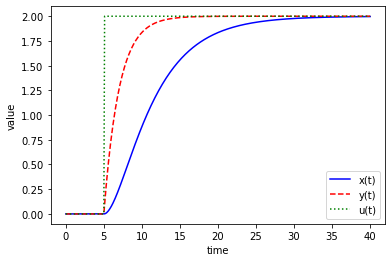

In [257]:
plt.plot(t, y, 'b-', label = 'x(t)')
plt.plot(t, x, 'r--', label = 'y(t)')
plt.plot(t, u, 'g:', label = 'u(t)')
plt.xlabel('time')
plt.ylabel('value')
plt.legend()
plt.show()